<h1> Checkpoint:</h1>

**Looking to see completetion and effort in completing the checkpoint. It's okay if it's not correct**

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import numpy, pandas, matplotlib, and seaborn

(Feel free to import other libraries!)

In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [349]:
df = pd.read_csv("states_edu.csv")

print(df.head())

       PRIMARY_KEY       STATE  YEAR  ENROLL  TOTAL_REVENUE  FEDERAL_REVENUE  \
0     1992_ALABAMA     ALABAMA  1992     NaN      2678885.0         304177.0   
1      1992_ALASKA      ALASKA  1992     NaN      1049591.0         106780.0   
2     1992_ARIZONA     ARIZONA  1992     NaN      3258079.0         297888.0   
3    1992_ARKANSAS    ARKANSAS  1992     NaN      1711959.0         178571.0   
4  1992_CALIFORNIA  CALIFORNIA  1992     NaN     26260025.0        2072470.0   

   STATE_REVENUE  LOCAL_REVENUE  TOTAL_EXPENDITURE  INSTRUCTION_EXPENDITURE  \
0      1659028.0       715680.0          2653798.0                1481703.0   
1       720711.0       222100.0           972488.0                 498362.0   
2      1369815.0      1590376.0          3401580.0                1435908.0   
3       958785.0       574603.0          1743022.0                 964323.0   
4     16546514.0      7641041.0         27138832.0               14358922.0   

   ...  GRADES_4_G  GRADES_8_G  GRADES_12_G 

You should always familiarize yourself with what each column in the dataframe represents. \ Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [350]:
df.dropna(subset=['AVG_READING_8_SCORE'], inplace=True)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Predictor for Test: **<Math/Reading for 4/8 grade>**   (Ex. Math for 8th grade)

Reading for 8th grade

Predictor Score in the questions refers to the predictor variable you chose here.

How many different years of data are in our dataset? Use a pandas function.

In [351]:
unique_years = (df["YEAR"].unique().shape)[0]
print(unique_years)

13


Let's compare Michigan to Ohio. Which state has the higher average predictor score across all years?

In [352]:
michigan_avg_score_series = df.loc[df["STATE"] == "MICHIGAN", ["AVG_READING_8_SCORE"]]
ohio_avg_score_series = df.loc[df["STATE"] == "OHIO", ["AVG_READING_8_SCORE"]]

mich = michigan_avg_score_series.dropna()
ohio = ohio_avg_score_series.dropna()

mich_average = float(mich.sum() / len(mich))
ohio_average = float(ohio.sum() / len(ohio))

if mich_average > ohio_average:
    print("Michigan has the higher average at "+str(mich_average)+" compared to "+str(ohio_average)+".")
elif ohio_average > mich_average:
    print("Ohio has the higher average at "+str(ohio_average)+" compared to "+str(mich_average)+".")
    


Ohio has the higher average at 267.7 compared to 263.5.


Find the average for your pedictor score across all states in 2019

In [353]:
predictor_2019 = df.loc[df["YEAR"]==2019, ["AVG_READING_8_SCORE"]]
print(float((predictor_2019).sum()) / (df.loc[df["YEAR"]==2019, ["STATE"]]).size)

262.5660377358491


Find the maximum predictor score for every state. Hint: there's a function that allows you to do this easily

In [354]:
x = df.groupby("STATE")["AVG_READING_8_SCORE"].max()
display(x)


STATE
ALABAMA                 259.0
ALASKA                  261.0
ARIZONA                 263.0
ARKANSAS                262.0
CALIFORNIA              263.0
COLORADO                271.0
CONNECTICUT             275.0
DELAWARE                267.0
DISTRICT_OF_COLUMBIA    250.0
DODEA                   280.0
FLORIDA                 267.0
GEORGIA                 266.0
HAWAII                  261.0
IDAHO                   270.0
ILLINOIS                267.0
INDIANA                 272.0
IOWA                    269.0
KANSAS                  269.0
KENTUCKY                270.0
LOUISIANA               257.0
MAINE                   271.0
MARYLAND                274.0
MASSACHUSETTS           278.0
MICHIGAN                266.0
MINNESOTA               271.0
MISSISSIPPI             256.0
MISSOURI                268.0
MONTANA                 273.0
NATIONAL                268.0
NEBRASKA                270.0
NEVADA                  262.0
NEW_HAMPSHIRE           275.0
NEW_JERSEY              276.0
NEW_

<h2> Feature Selection </h2>

After exploring the data, you now have to choose features that you would use to predict the performance of the students on a chosen test (your chosen predictor). By the way, you can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features

In [355]:

#I will be using AVG_READING_4_SCORE as a feature

#this is a feature:
df["rev_per_stu"] = df["TOTAL_REVENUE"] / df["GRADES_ALL_G"]


#this is a feature:
df["instruc_expend_per_stu"] = df["INSTRUCTION_EXPENDITURE"] / df["GRADES_ALL_G"]




Final feature list: The average of the average 4th grade reading test scores for each state, The average total revenue per student for each state, and The average instructional expenditure per student for each state

Feature selection justification: I chose my first feature because I believe that using past test results to predict future test results is crucial to making accurate decisions because there is no other metric I could identify that is as similar to the variable we are trying to find. I chose my second feature because I believe it is conventional knowledge that wealthier areas tend to do better in school, so I thought calculating the revenue per student would be a good measure of overall wealth in the context of the dataset. I chose my third feature because I believe showing the instructional expenditure per student best quantifies the resources going towards each child's education, and therefore quantifies the overall quality of education. The other categories for expenditure seemed too broad to have as direct of an impact on a child as instructional expenditure. 

<h2>Visualization</h2>

Use any graph you wish to see the relationship of your chosen predictor with any features you chose

**Visualization 1**

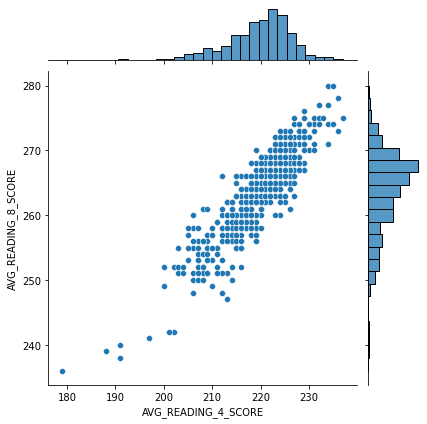

In [356]:


m = sns.jointplot(x=df["AVG_READING_4_SCORE"],y=df["AVG_READING_8_SCORE"])


There appears to be a relatively strong, positive correlation between average 8th grade reading scores and average 4th grade reading scores. This follows the notion that past performance is a solid predictor of future performance.

**Visualization 2**

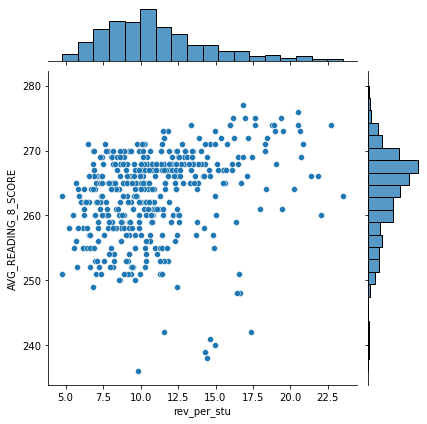

In [357]:
n = sns.jointplot(x=df["rev_per_stu"],y=df["AVG_READING_8_SCORE"])

There appear to be a weak, positive correlation between average 8th grade reading score and the total revenue per student. The positive relationship could be due to fact that wealthier areas tend to do better in school overall, but the relationship is still weak nonetheless.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
X = df[["instruc_expend_per_stu", "rev_per_stu", "AVG_READING_4_SCORE"]].dropna()
y = df.loc[X.index]["AVG_READING_8_SCORE"]




In [360]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

ML Models Resource: https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a

Chosen ML task: CLASSIFICATION

In [361]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [362]:
# create your model here
model = LinearRegression()

In [363]:
model.fit(X_train, y_train)

LinearRegression()

In [364]:
y_pred = model.predict(X_test)

In [365]:
print(model.score(X_test, y_test))

print(np.mean(model.predict(X_test)-y_test))

print(np.mean(np.abs(model.predict(X_test)-y_test)))

print(np.mean((model.predict(X_test)-y_test)**2)**0.5)


0.7935765111853686
-0.279701019071523
2.510295797394309
3.1634733667335464


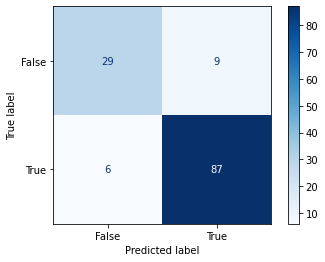

In [366]:
# FOR CLASSIFICATION ONLY:

y = df.loc[X.index]['AVG_READING_8_SCORE']>260

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

model.fit(X_train, y_train)

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test,
                         cmap=plt.cm.Blues)

In [367]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.


col_name = ??
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel(??)

SyntaxError: invalid syntax (<ipython-input-367-d4c50a7efab6>, line 7)

In [368]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

print(accuracy_score(y_test, model.predict(X_test)))
print(recall_score(y_test, model.predict(X_test)))
print(precision_score(y_test, model.predict(X_test)))

0.8854961832061069
0.9354838709677419
0.90625


<h2> Summary </h2>

My model's relatively high accuracy and precision scores show that it was fairly close and consistent in predicting average 8th grade reading scores. I also yielded an r squared value of 0.79 which shows that 79% of the variability in 8th grade reading scores is accounted for by my regression model. It makes sense that my model is fairly accurate because using past test scores as a metric to determine future ones provides us with data that are very comparable and highly correlated. Using revenue per student and instructional expenditure student may have contributed, but the fairly weak relationship found earlier between 8th grade reading scores and total revenue per student makes me believe that these factors contributed less to the relatively high accuracy. My classification plot also shows that my model predicted wrong in 15/131 cases.